# Nona polygon

POINT (10.82 3)
0.3200000000000003
The point is not within any of the polygons.


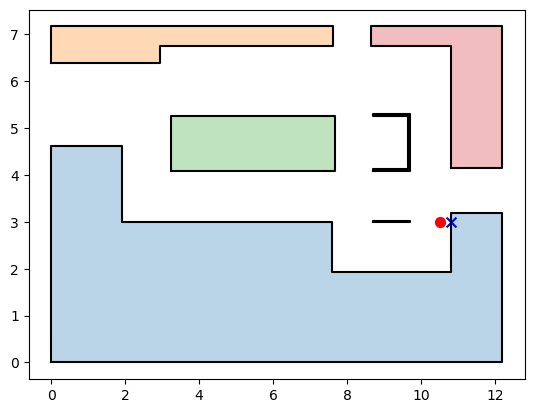

In [11]:
import json
from shapely.geometry import Point, Polygon, MultiLineString
from shapely.ops import nearest_points

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as mplPolygon

map_dir = "testnona.json"
with open(map_dir, "r") as file:
            # Load the JSON content into a Python dictionary
            data = json.load(file)

polygons = [Polygon(coords) for coords in data["polygons"]]

def is_point_within_polygons(point, polygons):
    for polygon in polygons:
        if point.within(polygon):
            return True
    return False

def find_nearest_boundary_point(query_point, polygons):
    # Combine the exterior boundaries of all polygons into a MultiLineString
    boundary = MultiLineString([polygon.exterior for polygon in polygons])
    
    # Find the nearest points on the boundary to the query_point
    nearest_point = nearest_points(query_point, boundary)[1]
    distance = nearest_point.distance(query_point)
    return nearest_point, distance

# Replace the x and y coordinates with the ones you want to check
x = 10.5
y = 3
point = Point(x, y)
nearest_boundary_point, distance = find_nearest_boundary_point(point, polygons)

fig, ax = plt.subplots()

for polygon in polygons:
    x, y = polygon.exterior.xy
    ax.plot(x, y, 'k-') # change 'k-' to any other color, linestyle
    ax.fill(x, y, alpha=0.3) # change alpha to control the transparency
    
plt.scatter(point.x, point.y, color='red', marker='o', s=50)
plt.scatter(nearest_boundary_point.x, nearest_boundary_point.y, color='blue', marker='x', s=50)
print(nearest_boundary_point)
print(distance)
if is_point_within_polygons(point, polygons):
    print("The point is within one of the polygons.")
else:
    print("The point is not within any of the polygons.")